In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


# Function to load images from a folder in batches
def load_images_from_folder_in_batches(folder, batch_size=1000):
    class_names = [d for d in os.listdir(folder) if os.path.isdir(os.path.join(folder, d))]
    print(f"Found classes: {class_names}")
    
    images = []
    labels = []
    
    for class_name in class_names:
        class_folder = os.path.join(folder, class_name)
        files = os.listdir(class_folder)
        
        for start in range(0, len(files), batch_size):
            end = min(start + batch_size, len(files))
            batch_files = files[start:end]
            
            for filename in batch_files:
                img_path = os.path.join(class_folder, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (128, 128))  # Resize to 128x128
                    images.append(img)
                    labels.append(class_name)
                else:
                    print(f"Could not load image: {img_path}")
            
            yield np.array(images), np.array(labels)
            images, labels = [], []


In [3]:
# Function to visualize a few images
def visualize_images(images, labels):
    if len(images) == 0:
        print("No images to display")
        return
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(len(images), 9, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[idx])
        plt.title(labels[idx])
        plt.axis('off')
    plt.show()

In [4]:
# Load and preprocess images
dataset_folder = 'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\train'
batch_size = 1000 


Found classes: ['cat', 'dog', 'wild']


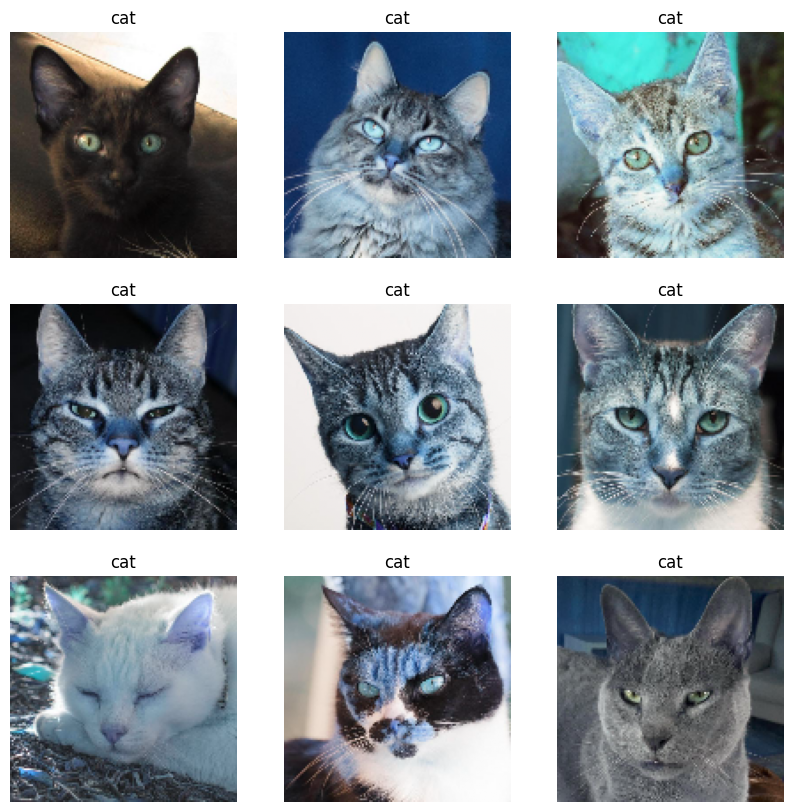

In [5]:
# Process and visualize one batch for verification
for images, labels in load_images_from_folder_in_batches(dataset_folder, batch_size):
    # Normalize images
    images = images / 255.0  # Normalize pixel values to [0, 1]
    
    # Visualize a few images
    visualize_images(images, labels)
    break  # Only visualize the first batch for now

In [6]:
def cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [7]:
# Define input shape and number of classes
input_shape = (128, 128, 3)
num_classes = 3  # Cat, Dog, Wildlife


In [8]:
# Create the CNN model
model = cnn_model(input_shape, num_classes)
model.summary()


c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [28]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of the data for validation
)

# Load data generators
train_gen = datagen.flow_from_directory(
    'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse',
    subset='validation'
)


Found 11706 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [29]:
# Train the model
epochs = 10
history = model.fit(train_gen, epochs=epochs, validation_data=val_gen)

Epoch 1/10


c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


366/366 ━━━━━━━━━━━━━━━━━━━━ 353s 948ms/step - accuracy: 0.5478 - loss: 11.9970 - val_accuracy: 0.7867 - val_loss: 0.5465
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 230s 622ms/step - accuracy: 0.7763 - loss: 0.5618 - val_accuracy: 0.6333 - val_loss: 0.7889
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 220s 594ms/step - accuracy: 0.7482 - loss: 0.6089 - val_accuracy: 0.8067 - val_loss: 0.4667
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 203s 550ms/step - accuracy: 0.8416 - loss: 0.4184 - val_accuracy: 0.8700 - val_loss: 0.3924
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 266s 723ms/step - accuracy: 0.8741 - loss: 0.3487 - val_accuracy: 0.8833 - val_loss: 0.2925
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 225s 610ms/step - accuracy: 0.8790 - loss: 0.3262 - val_accuracy: 0.8900 - val_loss: 0.2556
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 249s 676ms/step - accuracy: 0.9114 - loss: 0.2574 - val_accuracy: 0.8867 - val_loss: 0.2890
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 258s 699ms/step - accuracy: 0.9137 - loss: 0.2

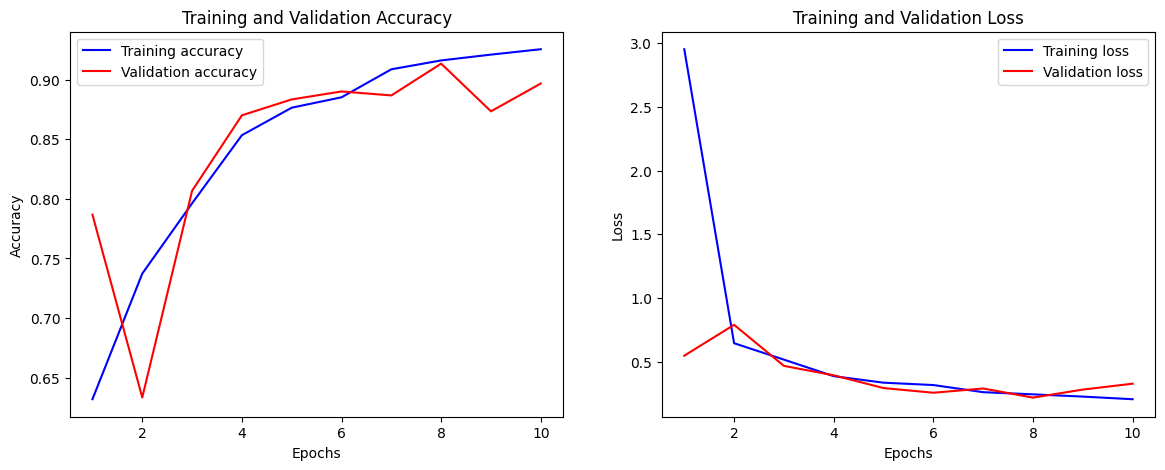

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history
plot_training_history(history)


In [31]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_gen)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 390ms/step - accuracy: 0.8821 - loss: 0.3348
Validation Loss: 0.35134902596473694
Validation Accuracy: 0.8833333253860474


In [33]:
# Save the trained model
model.save('animal_emotion_cnn_model.h5')
print("Model saved as animal_emotion_cnn_model.h5")

Model saved as animal_emotion_cnn_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Confusion Matrix:
[[0 1 0]
 [0 1 0]
 [0 1 0]]

Classification Report:
              precision    recall  f1-score   support

         Cat       0.00      0.00      0.00         1
         Dog       0.33      1.00      0.50         1
    Wildlife       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

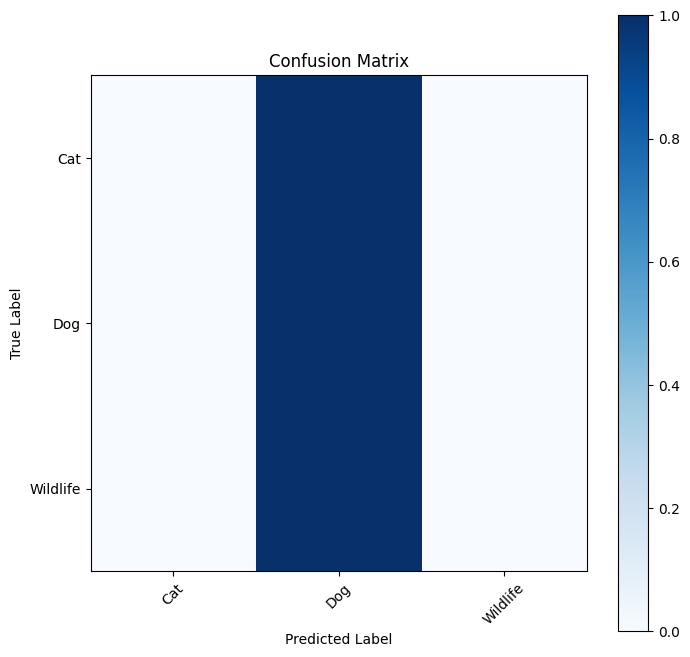

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load your trained model
model = tf.keras.models.load_model('animal_emotion_cnn_model.h5')

# Define paths and true labels
image_paths = [
    r'C:\Users\Lenovo\Downloads\Animal Emotion\afhq\train\cat\flickr_cat_000002.jpg',
    r'C:\Users\Lenovo\Downloads\Animal Emotion\afhq\train\dog\flickr_dog_000005.jpg',
    r'C:\Users\Lenovo\Downloads\Animal Emotion\afhq\train\wild\flickr_wild_000006.jpg'
]
true_labels = ['Cat', 'Dog', 'Wildlife']  # Replace with your actual true labels

# Define class names (modify based on your actual class names)
class_names = ['Cat', 'Dog', 'Wildlife']

# Preprocess images and make predictions
predicted_labels = []
for image_path in image_paths:
    # Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize and add batch dimension
    
    # Predict using the loaded model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)  # Get the index of the class with highest probability
    predicted_label = class_names[predicted_class]  # Get the predicted label from class_names
    
    # Append predicted label
    predicted_labels.append(predicted_label)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)

# Show plot
plt.show()


In [12]:
import os
from collections import Counter

# Define the path to your dataset
dataset_path = 'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\train'

# Initialize counters for each class
cat_count = 0
dog_count = 0
wildlife_count = 0

# Iterate through the dataset directory to count images in each class
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if 'cat' in root.lower():
            cat_count += 1
        elif 'dog' in root.lower():
            dog_count += 1
        elif 'wild' in root.lower():
            wildlife_count += 1

# Print the counts of each class
print(f'Cat images: {cat_count}')
print(f'Dog images: {dog_count}')
print(f'Wildlife images: {wildlife_count}')


Cat images: 5153
Dog images: 4739
Wildlife images: 4738


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Confusion Matrix:
[[0 1 0]
 [0 1 0]
 [0 1 0]]

Classification Report:
              precision    recall  f1-score   support

         Cat       0.00      0.00      0.00         1
         Dog       0.33      1.00      0.50         1
    Wildlife       0.00      0.00      0.00         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lenovo\Downloads\Animal Emotion\animalenv\lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

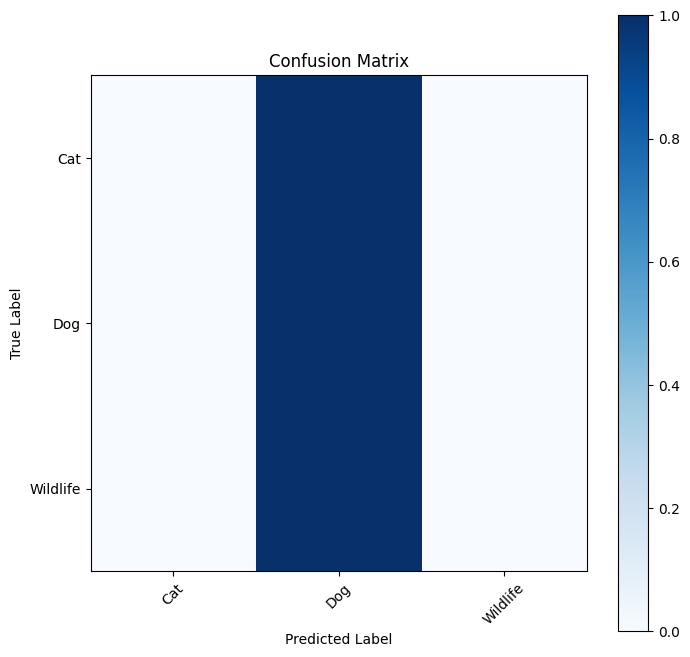

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model('animal_emotion_cnn_model.h5')

# Define paths to test images and their true labels
test_image_paths = [
    'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\val\cat\\flickr_cat_000008.jpg',
    'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\val\dog\\flickr_dog_000043.jpg',
    'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\val\wild\\flickr_wild_000004.jpg',
    # Add more test images as needed
]
true_labels = ['Cat', 'Dog', 'Wildlife']  # Replace with actual true labels

# Define class names
class_names = ['Cat', 'Dog', 'Wildlife']

# Preprocess images and make predictions
predicted_labels = []
for image_path in test_image_paths:
    # Load and preprocess the image
    img = load_img(image_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize and add batch dimension
    
    # Predict using the loaded model
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    predicted_label = class_names[predicted_class]
    
    # Append predicted label
    predicted_labels.append(predicted_label)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)
print("\nClassification Report:")
print(class_report)

# Show plot
plt.show()


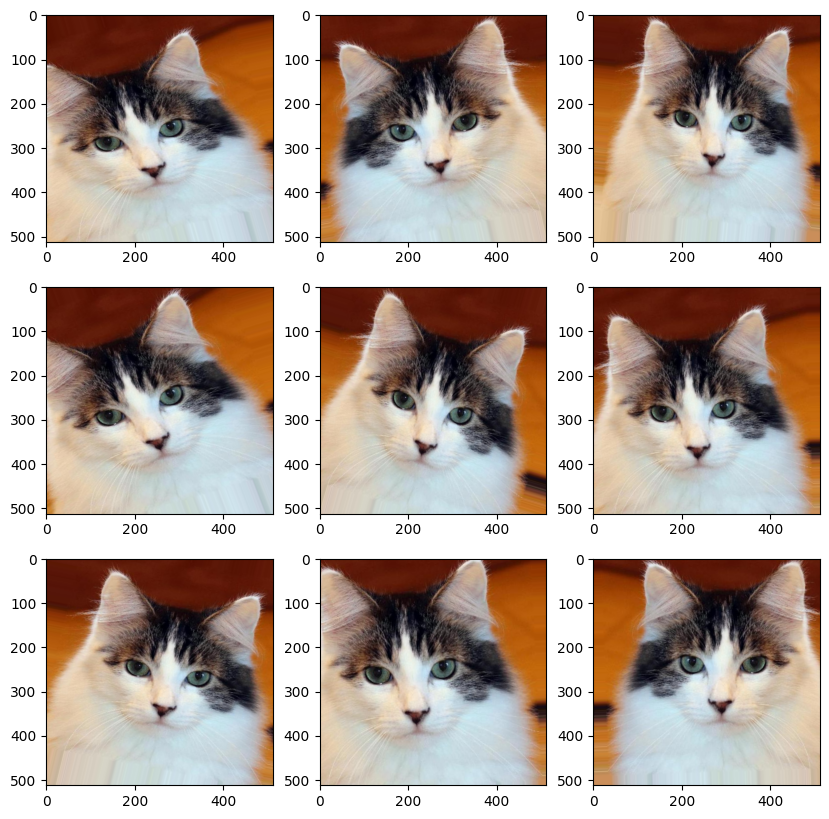

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Define an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 20)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    shear_range=0.1,  # randomly apply shear transformation
    zoom_range=0.1,  # randomly zoom inside pictures
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False,  # randomly flip images vertically
    fill_mode='nearest'  # strategy used for filling in newly created pixels
)

# Load a sample image and apply augmentation
img_path = 'C:\\Users\\Lenovo\\Downloads\\Animal Emotion\\afhq\\val\cat\\flickr_cat_000008.jpg'  # Replace with an actual image path
img = load_img(img_path)
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# Generate augmented images and visualize
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3, 3, i+1)
    plt.imshow(batch[0].astype('uint8'))  # Convert to uint8 for matplotlib display
    i += 1
    if i % 9 == 0:
        break
plt.show()
